In [5]:
import nltk

In [15]:
%config

Available objects for config:
     AliasManager
     ColabHistoryManager
     ColabKernelApp
     DisplayFormatter
     IPCompleter
     InlineBackend
     LoggingMagics
     MagicsManager
     OSMagics
     PrefilterManager
     ScriptMagics
     Shell
     StoreMagics


In [4]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [1]:
messages = [line.rstrip() for line in open('/content/SMSSpamCollection')]

In [2]:
print(len(messages))

5574


In [11]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [12]:
messages[40]

'ham\tPls go ahead with watts. I just wanted to be sure. Do have a great weekend. Abiola'

In [17]:
%config Application.iopub_data_rate_limit=10000000

In [18]:
for mess_no in enumerate(messages[:10]):
  print(mess_no, messages)
  print()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
messages[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('/content/SMSSpamCollection', sep='\t',
                       names=['label','message']
                      )

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe(include='all')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='Frequency'>

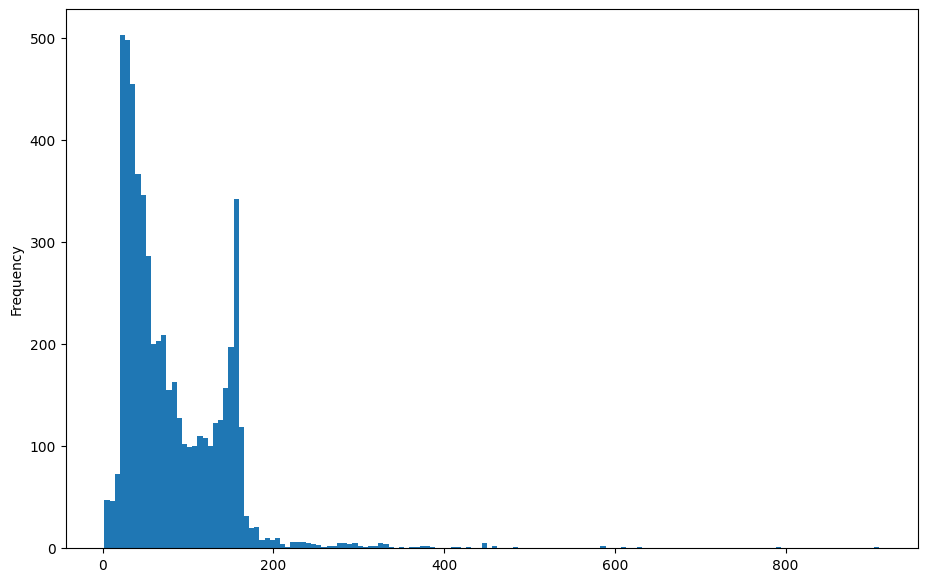

In [17]:
plt.figure(figsize=(11, 7))
messages['length'].plot.hist(bins=150)

In [19]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [22]:
messages[messages['length'] == 910].iloc[0]

label                                                    ham
message    For me the love should start with attraction.i...
length                                                   910
Name: 1085, dtype: object

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

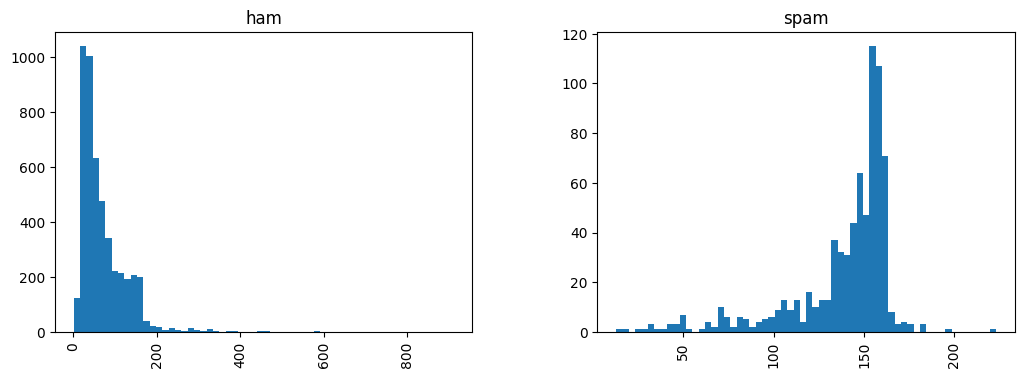

In [23]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

In [24]:
import string

In [25]:
mess = 'Sample message! Notice: it has punctuation.'

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
nopunc = [c for c in mess if c not in string.punctuation]

In [48]:
from nltk.corpus import stopwords

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
nopunc = ''.join(nopunc)

In [51]:
nopunc

'Sample message Notice it has punctuation'

In [52]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [54]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [55]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [69]:
def text_process(mess):

  nopunc = [char for char in mess if char not in string.punctuation]

  nopunc = ''.join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



In [70]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [73]:
print(len(bow_transformer.vocabulary_))

11425


In [74]:
mess_4 = messages['message'][3]

In [75]:
mess_4

'U dun say so early hor... U c already then say...'

In [76]:
bow_4 = bow_transformer.transform([mess_4])

In [78]:
print(bow_4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [79]:
messages_bow = bow_transformer.transform(messages['message'])

In [80]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [81]:
messages_bow.nnz

50548

In [82]:
from sklearn.feature_extraction.text import TfidfTransformer

In [83]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [85]:
tfidf4 = tfidf_transformer.transform(bow_4)

In [86]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [88]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [89]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [92]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [95]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [96]:
messages['label'][3]

'ham'

In [99]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [101]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [102]:
from sklearn.model_selection import train_test_split

In [111]:
msg_train, msg_test, label_train, label_test = train_test_split(
    messages['message'], messages['label'], test_size=0.3)

In [112]:
from sklearn.pipeline import Pipeline

In [113]:
pipeline = Pipeline([
                    ('bow', CountVectorizer(analyzer=text_process)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())
                    ])

In [114]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bd1f74a1a20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [115]:
predictions = pipeline.predict(msg_test)

In [116]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1438
        spam       1.00      0.75      0.86       234

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672



In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
pipeline = Pipeline([
                    ('bow', CountVectorizer(analyzer=text_process)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', RandomForestClassifier())
                    ])

In [122]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bd1f74a1a20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [123]:
predictions = pipeline.predict(msg_test)

In [124]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1438
        spam       0.99      0.80      0.89       234

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672

